# Understanding Conditional Edges in LangGraph

This Colab notebook demonstrates the concept of conditional edges in LangGraph, a powerful feature for creating dynamic, branching workflows in your graph-based applications.


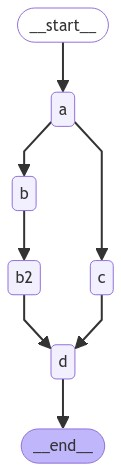

## Setup

First, let's install the required packages:


In [ ]:

pip install langgraph


Now, let's import the necessary modules:


In [ ]:
import datetime
import operator
import time
from typing import Annotated, Any, Dict, List
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

## Defining the State

In LangGraph, we use a `State` class to define the structure of our graph's state:


In [ ]:
class State(TypedDict):
    aggregate: Annotated[list, operator.add]



Here, we're using `Annotated[list, operator.add]` to specify that the `aggregate` field is a list that should be combined using the `add` operation when updates occur.

## Creating Node Functions

Let's define some simple node functions that will be part of our graph:


In [ ]:

def node_a(state: State) -> Dict[str, Any]:
    print("#### node_a enter,")
    time.sleep(1)
    return {"aggregate": ["node_a"]}


def node_b(state: State) -> Dict[str, Any]:
    print("#### node_b enter,")
    time.sleep(1)
    return {"aggregate": ["node_b"]}


def node_c(state: State) -> Dict[str, Any]:
    print("#### node_c enter,")
    time.sleep(1)
    return {"aggregate": ["node_c"]}


def node_d(state: State) -> Dict[str, Any]:
    print("#### node_d enter,")
    time.sleep(1)
    return {"aggregate": ["node_d"]}


def node_e(state: State) -> Dict[str, Any]:
    print("#### node_e enter,")
    time.sleep(1)
    return {"aggregate": ["node_e"]}


Each node function simulates some work by sleeping for a second and then returns a dictionary with an "aggregate" key containing the node's name.


## Defining the Conditional Routing Function

The heart of conditional edges is the routing function. This function determines which path(s) the graph should take based on the current state:


In [ ]:
def route(state: State) -> List[str]:
    if datetime.datetime.utcnow().second % 2 == 0:
        return ["node_b"]
    return ["node_c", "node_d"]



In [ ]:
builder = StateGraph(State)
intermediates = ["node_b", "node_c", "node_d"]
builder.add_node("node_a", node_a)
builder.add_node("node_b", node_b)
builder.add_node("node_c", node_c)
builder.add_node("node_d", node_d)
builder.add_node("node_e", node_e)

builder.add_edge(START, "node_a")
builder.add_edge("node_e", END)
builder.add_conditional_edges("node_a", route, intermediates)
for node in intermediates:
    builder.add_edge(node, "node_e")
graph = builder.compile()


In [ ]:
res = graph.invoke({"aggregate": []}, {"configurable": {"thread_id": "foo"}})
print(f"{res=}")

This will execute the graph and print the final state. The path taken will depend on whether the current second is even or odd when the `route` function is called.
